In [10]:
import numpy as np
import astropy.units as u
from astropy.io import fits
from matplotlib.patches import Rectangle, Circle
from pathlib import Path
from IPython.display import clear_output
from importlib import reload

import poppy
import logging, sys
poppy_log = logging.getLogger('poppy')
poppy_log.setLevel('DEBUG')
logging.basicConfig(stream=sys.stdout, level=logging.INFO)
poppy_log.disabled = True

import warnings
warnings.filterwarnings("ignore")

import apra_pop_models
import apra_pop_models.fraunhofer_coro_3 as fraunhofer
from apra_pop_models.math_module import xp, _scipy, ensure_np_array
import apra_pop_models.utils as utils
import apra_pop_models.props as props

from apra_pop_models.imshows import *

pupil_diam = 48*u.mm
wavelength_c = 650e-9*u.m

FN = 500
optimal_dm1_dm2 = (pupil_diam**2/(wavelength_c*FN)).to(u.mm)
display(optimal_dm1_dm2)

reload(utils)
# WFE = utils.generate_wfe(diam=pupil_diam, npix=1000, oversample=1,
#                          opd_index=2.75, amp_index=2.75, 
#                          opd_seed=123, amp_seed=1234,
#                          opd_rms=25*u.nm, amp_rms=0.05, 
#                          wavelength=wavelength_c)

# wfe_mask = xp.abs(WFE)>0
# wfe_amp = xp.abs(WFE)
# wfe_opd = xp.angle(WFE)*wavelength_c.to_value(u.m)/(2*np.pi)
# rms_amp = xp.sqrt(xp.mean(xp.square(wfe_amp[wfe_mask]-1)))
# rms_opd = xp.sqrt(xp.mean(xp.square(wfe_opd[wfe_mask])))
# imshow2(wfe_amp, wfe_opd,  f'{rms_amp:.3f}', f'{rms_opd:.3e}')


<Quantity 7089.23076923 mm>

<module 'apra_pop_models.utils' from '/home/kianmilani/Projects/apra-howfsc-models/apra_pop_models/utils.py'>

In [8]:
2/0.390625

5.12

In [6]:
2*50/128 + 50

50.78125

In [15]:
model.um_per_lamD, model.psf_pixelscale_lamD

(<Quantity 14.10590278 um>, 0.3544615384615385)

influence function sampling 8.138020833333334
Using the influence function supplied.
Including factor of 2 from reflection when computing OPD.
Using the influence function supplied.
Including factor of 2 from reflection when computing OPD.
0.3544615384615385
57091.71446207093


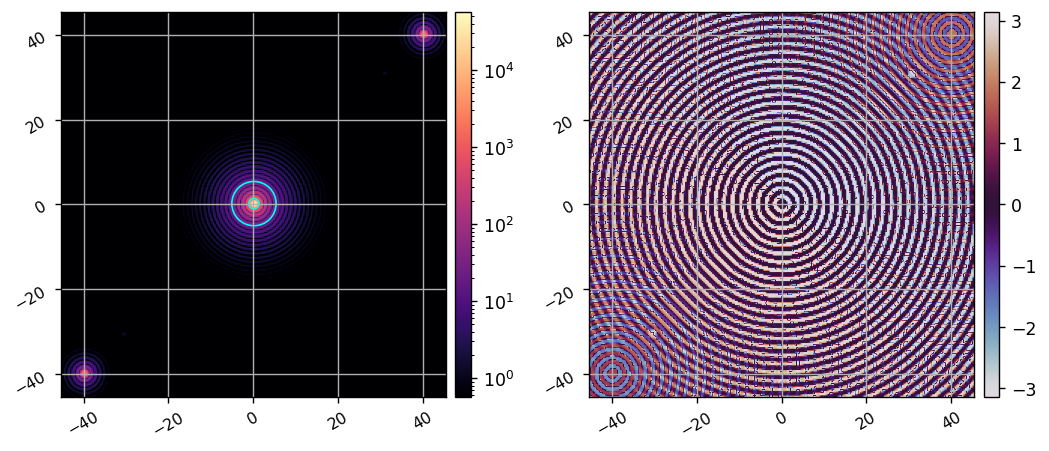

In [19]:
reload(fraunhofer)
reload(apra_pop_models.props)
model = fraunhofer.CORO()
print(model.psf_pixelscale_lamD)
model.reverse_parity = True
model.npsf = 256
# model.Imax_ref = 22129.50253150134

# WFE = xp.array(fits.getdata('../phase-retrieval-data/post_fpm_wfe_20240503.fits'))
# WFE = WFE[0] * xp.exp(1j*2*np.pi*WFE[1]/wavelength_c.to_value(u.m))
# wfe_amp = xp.abs(WFE)
# wfe_opd = xp.angle(WFE)*wavelength_c.to_value(u.m)/(2*np.pi)
# rms_amp = xp.sqrt(xp.mean(xp.square(wfe_amp[model.APMASK]-1)))
# rms_opd = xp.sqrt(xp.mean(xp.square(wfe_opd[model.APMASK])))
# imshow2(wfe_amp, wfe_opd,  f'{rms_amp:.3f}', f'{rms_opd:.3e}')
# model.WFE = WFE
# model.Imax_ref = 0.017874510571953023

pup_ratio = model.pupil_diam.to_value(u.m)/model.dm_active_diam.to_value(u.m)
xpp = (xp.arange(-model.Nact//2, model.Nact//2) + 1/2)/pup_ratio/0.9
ppx, ppy = xp.meshgrid(xpp,xpp)
amp = 5e-8
separation = 40
comm1 = amp*xp.cos(2*np.pi*(ppx + ppy)*separation/model.Nact)*xp.array(model.dm_mask)
comm2 = amp*xp.cos(2*np.pi*(ppx - ppy)*separation/model.Nact)*xp.array(model.dm_mask)
model.set_dm1(ensure_np_array(comm1))
# model.set_dm2(ensure_np_array(comm2))

# model.use_fpm = True

wfs = model.calc_wfs()
im = xp.abs(wfs[-1])**2
print(xp.max(im))
imshow2(im, xp.angle(wfs[-1]), lognorm1=True, vmin1=xp.max(im)/1e5, cmap2='twilight', 
        pxscl=model.psf_pixelscale_lamD, grid=True, 
        patches1=[Circle((model.psf_pixelscale_lamD/2,model.psf_pixelscale_lamD/2), 1.22, fill=False, color='cyan'),
                  Circle((model.psf_pixelscale_lamD/2,model.psf_pixelscale_lamD/2), 1.22+4, fill=False, color='cyan')])


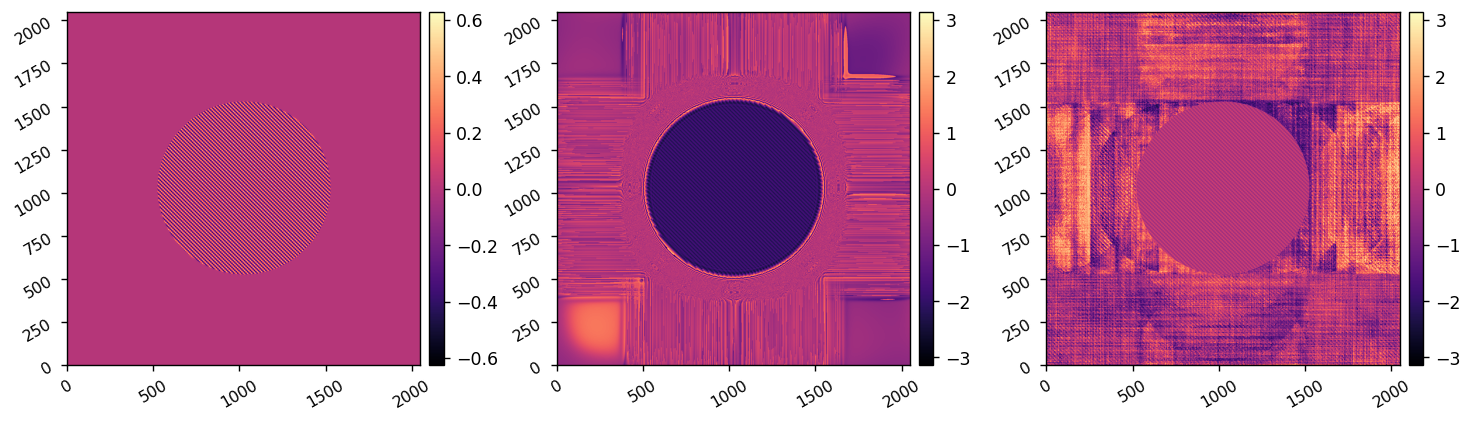

In [20]:
dm1_wf_phase = xp.angle(wfs[-6])
dm2_wf_phase = xp.angle(wfs[-5])
pupil_wf = xp.angle(wfs[-4])
imshow3(dm1_wf_phase, dm2_wf_phase, pupil_wf)